In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eth-usd-1h-yahoo/ETH-USD_1h_data.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2022-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-12.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-08.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-11.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-12.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2023-05.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-04.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-02.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-03.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2022-10.csv
/kaggle/input/btc-usdt-1h-binance-

**General Information**

Data ranges from 2018-05-15 06:00:00 to 2023-06-13 00:00:00. Information about features is below.

**Features:**
* open_time: Kline Open time in unix time format
* open: Open Price
* high: High Price
* low: Low Price
* close: Close Price
* volume: Volume
* close_time: Kline Close time in unix time format
* quote_volume: Quote Asset Volume
* count: Number of Trades
* taker_buy_volume: Taker buy quote asset volume during this period
* taker_buy_quote_volume: Taker buy base asset volume during this period
* ignore : Ignore(youcan drop this feature)


In [2]:
dir_btc = "/kaggle/input/btc-usdt-1h-binance-api"
dir_eth = "/kaggle/input/eth-usdt-1h-binance-api"

In [3]:
directories_btc = []
for dirpath, _, filenames in os.walk(dir_btc):
    for filename in filenames:  
    # Append the absolute path of each directory to the list
        directories_btc.append(os.path.join(dirpath, filename))
        

# Print first 10 of the directories
for directory in directories_btc[:10]:
    print(directory)

/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2023-05.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-04.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-02.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-03.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2022-10.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-03.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2021-04.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-11.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2019-09.csv
/kaggle/input/btc-usdt-1h-binance-api/BTCUSDT-1h-2020-10.csv


In [4]:
directories_eth = []
for dirpath, _, filenames in os.walk(dir_eth):
    for filename in filenames:  
    # Append the absolute path of each directory to the list
        directories_eth.append(os.path.join(dirpath, filename))
        

# Print first 10 of the directories
for directory in directories_eth[:10]:
    print(directory)

/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2022-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-12.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-05.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2023-01.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-08.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2021-11.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-10.csv
/kaggle/input/eth-usdt-1h-binance-api/ETHUSDT-1h-2019-12.csv


In [5]:
# Create empty dataset for Bitcoin
df_btc = pd.DataFrame()

for directory in directories_btc:
    df_btc_sub = pd.read_csv(directory, header = None)
    file = directory.split("/")[-1]
    try:
        print(f"{file} merge with succesfully")
        df_btc = pd.concat([df_btc, df_btc_sub], axis = 0)
    except:
        print(f"{file} does not merge")

BTCUSDT-1h-2023-05.csv merge with succesfully
BTCUSDT-1h-2020-04.csv merge with succesfully
BTCUSDT-1h-2021-02.csv merge with succesfully
BTCUSDT-1h-2021-03.csv merge with succesfully
BTCUSDT-1h-2022-10.csv merge with succesfully
BTCUSDT-1h-2020-03.csv merge with succesfully
BTCUSDT-1h-2021-04.csv merge with succesfully
BTCUSDT-1h-2020-11.csv merge with succesfully
BTCUSDT-1h-2019-09.csv merge with succesfully
BTCUSDT-1h-2020-10.csv merge with succesfully
BTCUSDT-1h-2019-12.csv merge with succesfully
BTCUSDT-1h-2021-09.csv merge with succesfully
BTCUSDT-1h-2023-01.csv merge with succesfully
BTCUSDT-1h-2020-05.csv merge with succesfully
BTCUSDT-1h-2022-08.csv merge with succesfully
BTCUSDT-1h-2021-05.csv merge with succesfully
BTCUSDT-1h-2022-05.csv merge with succesfully
BTCUSDT-1h-2022-09.csv merge with succesfully
BTCUSDT-1h-2021-08.csv merge with succesfully
BTCUSDT-1h-2020-09.csv merge with succesfully
BTCUSDT-1h-2022-03.csv merge with succesfully
BTCUSDT-1h-2021-12.csv merge with 

In [6]:
df_eth = pd.DataFrame()
for directory in directories_eth:
    df_eth_sub = pd.read_csv(directory, header = None)
    file = directory.split("/")[-1]
    try:
        print(f"{file} merge with succesfully")
        df_eth = pd.concat([df_eth, df_eth_sub], axis = 0)
    except:
        print(f"{file} does not merge")

ETHUSDT-1h-2021-10.csv merge with succesfully
ETHUSDT-1h-2022-01.csv merge with succesfully
ETHUSDT-1h-2021-12.csv merge with succesfully
ETHUSDT-1h-2023-05.csv merge with succesfully
ETHUSDT-1h-2021-05.csv merge with succesfully
ETHUSDT-1h-2023-01.csv merge with succesfully
ETHUSDT-1h-2021-08.csv merge with succesfully
ETHUSDT-1h-2021-11.csv merge with succesfully
ETHUSDT-1h-2019-10.csv merge with succesfully
ETHUSDT-1h-2019-12.csv merge with succesfully
ETHUSDT-1h-2019-11.csv merge with succesfully
ETHUSDT-1h-2022-04.csv merge with succesfully
ETHUSDT-1h-2023-04.csv merge with succesfully
ETHUSDT-1h-2020-01.csv merge with succesfully
ETHUSDT-1h-2022-03.csv merge with succesfully
ETHUSDT-1h-2020-03.csv merge with succesfully
ETHUSDT-1h-2023-03.csv merge with succesfully
ETHUSDT-1h-2021-09.csv merge with succesfully
ETHUSDT-1h-2020-10.csv merge with succesfully
ETHUSDT-1h-2020-07.csv merge with succesfully
ETHUSDT-1h-2021-07.csv merge with succesfully
ETHUSDT-1h-2022-06.csv merge with 

In [7]:
# Create list of columns name
columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_volume", "taher_buy_quote_volume", "ignore"]

#Append columns name to datasets
df_btc.columns = columns
df_eth.columns = columns

In [8]:
df_btc.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,ignore
0,1682899200000,29233.20,29337.34,29215.93,29315.57,1884.84043,1682902799999,5.520089e+07,43324,898.64952,2.631818e+07,0
1,1682902800000,29315.57,29315.57,28369.95,28504.36,7975.68782,1682906399999,2.293187e+08,138973,3628.42240,1.042351e+08,0
2,1682906400000,28504.36,28680.38,28414.00,28549.41,4047.55713,1682909999999,1.157070e+08,80081,1951.63029,5.578657e+07,0
3,1682910000000,28549.42,28592.95,28436.27,28561.06,2058.76530,1682913599999,5.874546e+07,39032,985.69333,2.812657e+07,0
4,1682913600000,28561.07,28589.84,28486.29,28555.00,1378.42285,1682917199999,3.933649e+07,27790,632.14694,1.803986e+07,0


In [9]:
df_eth.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,ignore
0,1633046400000,3000.62,3041.42,2997.49,3020.09,22147.7842,1633049999999,6.693533e+07,43129,11341.1719,3.428211e+07,0
1,1633050000000,3020.10,3029.65,2998.00,3021.65,11641.9699,1633053599999,3.508203e+07,31440,5476.1103,1.650518e+07,0
2,1633053600000,3021.66,3029.68,2980.00,2988.85,12567.7042,1633057199999,3.769615e+07,31820,6142.8028,1.842570e+07,0
3,1633057200000,2988.85,3011.70,2969.07,3002.98,15653.1816,1633060799999,4.688183e+07,28952,7754.6655,2.322538e+07,0
4,1633060800000,3002.98,3017.98,2990.00,2999.93,11136.0856,1633064399999,3.342894e+07,29963,5980.8879,1.795275e+07,0


In [10]:
# Change open_time and close_time data type to date with format %y-%m-%d %h-%m-%s

df_btc["open_time"] = pd.to_datetime(df_btc["open_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")
df_eth["open_time"] = pd.to_datetime(df_eth["open_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")

df_btc["close_time"] = pd.to_datetime(df_btc["close_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")
df_eth["close_time"] = pd.to_datetime(df_eth["close_time"], unit = "ms").dt.strftime("%Y-%m-%d %H:%M:%S")


# Change Index of Datasets
df_btc = df_btc.set_index("open_time")
df_eth = df_eth.set_index("open_time")

In [11]:
df_btc.index = pd.to_datetime(df_btc.index)
df_eth.index = pd.to_datetime(df_eth.index)

In [12]:
# Change Order of Datasets
df_btc = df_btc.sort_index(ascending =True)
df_eth = df_eth.sort_index(ascending =True)

# UTİLS

In [13]:
def check_number_unique(dataframe):
    for col in dataframe.columns:
        if dataframe[col].nunique() == 1:
            print(f"There is one unique value on {col} column")
        else:
            continue
    return None

In [14]:
def datetime_features(dataframe):
    dataframe["hour"] = dataframe.index.hour
    dataframe["month"] = dataframe.index.month
    dataframe["year"] = dataframe.index.year
    dataframe["day"] = dataframe.index.day
    dataframe["dayofweek"] = dataframe.index.dayofweek
    dataframe["quarter"] = dataframe.index.quarter
    dataframe["weekofyear"] = dataframe.index.isocalendar().week
    return dataframe

In [15]:
def draw_boxplot(dataframe, col, target = "close"):
    plt.figure(figsize = (15,6))
    sns.boxplot(data = dataframe, x = col, y = target)
    plt.xlabel(col)
    plt.ylabel(f"{target.capitalize()} Prices")
    plt.title(f"{target.capitalize()} Prices by {col}")
    plt.show()

In [16]:
def month_category_for_bitcoin(month):
    if month in [1, 2, 3, 4]:
        return 1
    elif month in [5, 6, 12]:
        return 2
    else:
        return 3

# EDA

In [17]:
# Drop ignore and close_time columns in datasets
df_btc = df_btc.drop(["ignore", "close_time"], axis = 1)
df_eth = df_eth.drop(["ignore", "close_time"], axis = 1)

In [18]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32821 entries, 2019-09-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    32821 non-null  float64
 1   high                    32821 non-null  float64
 2   low                     32821 non-null  float64
 3   close                   32821 non-null  float64
 4   volume                  32821 non-null  float64
 5   quote_volume            32821 non-null  float64
 6   count                   32821 non-null  int64  
 7   taker_buy_volume        32821 non-null  float64
 8   taher_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [19]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32821 entries, 2019-09-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    32821 non-null  float64
 1   high                    32821 non-null  float64
 2   low                     32821 non-null  float64
 3   close                   32821 non-null  float64
 4   volume                  32821 non-null  float64
 5   quote_volume            32821 non-null  float64
 6   count                   32821 non-null  int64  
 7   taker_buy_volume        32821 non-null  float64
 8   taher_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [20]:
# To check if all date in between 2019-09-01 to 2023-05-31 on hourly basis is exist for bitcoin and ethereum
start_date = '2019-09-01 00:00:00'
end_date = '2023-05-31 23:00:00'

date_range = pd.date_range(start = start_date, end = end_date, freq = "H").to_numpy()
series_Date = pd.Series(date_range)

dates_missing_btc = [date for date in series_Date if not date in df_btc.index]
dates_missing_eth = [date for date in series_Date if not date in df_eth.index]
dates_missing_btc

[Timestamp('2019-11-13 02:00:00'),
 Timestamp('2019-11-13 03:00:00'),
 Timestamp('2019-11-25 02:00:00'),
 Timestamp('2019-11-25 03:00:00'),
 Timestamp('2020-02-09 02:00:00'),
 Timestamp('2020-02-19 12:00:00'),
 Timestamp('2020-02-19 13:00:00'),
 Timestamp('2020-02-19 14:00:00'),
 Timestamp('2020-02-19 15:00:00'),
 Timestamp('2020-02-19 16:00:00'),
 Timestamp('2020-03-04 10:00:00'),
 Timestamp('2020-04-25 02:00:00'),
 Timestamp('2020-04-25 03:00:00'),
 Timestamp('2020-06-28 02:00:00'),
 Timestamp('2020-06-28 03:00:00'),
 Timestamp('2020-06-28 04:00:00'),
 Timestamp('2020-11-30 06:00:00'),
 Timestamp('2020-12-21 15:00:00'),
 Timestamp('2020-12-21 16:00:00'),
 Timestamp('2020-12-21 17:00:00'),
 Timestamp('2020-12-25 02:00:00'),
 Timestamp('2021-02-11 04:00:00'),
 Timestamp('2021-03-06 02:00:00'),
 Timestamp('2021-04-20 02:00:00'),
 Timestamp('2021-04-20 03:00:00'),
 Timestamp('2021-04-25 05:00:00'),
 Timestamp('2021-04-25 06:00:00'),
 Timestamp('2021-04-25 07:00:00'),
 Timestamp('2021-08-

In [21]:
dates_missing_eth

[Timestamp('2019-11-13 02:00:00'),
 Timestamp('2019-11-13 03:00:00'),
 Timestamp('2019-11-25 02:00:00'),
 Timestamp('2019-11-25 03:00:00'),
 Timestamp('2020-02-09 02:00:00'),
 Timestamp('2020-02-19 12:00:00'),
 Timestamp('2020-02-19 13:00:00'),
 Timestamp('2020-02-19 14:00:00'),
 Timestamp('2020-02-19 15:00:00'),
 Timestamp('2020-02-19 16:00:00'),
 Timestamp('2020-03-04 10:00:00'),
 Timestamp('2020-04-25 02:00:00'),
 Timestamp('2020-04-25 03:00:00'),
 Timestamp('2020-06-28 02:00:00'),
 Timestamp('2020-06-28 03:00:00'),
 Timestamp('2020-06-28 04:00:00'),
 Timestamp('2020-11-30 06:00:00'),
 Timestamp('2020-12-21 15:00:00'),
 Timestamp('2020-12-21 16:00:00'),
 Timestamp('2020-12-21 17:00:00'),
 Timestamp('2020-12-25 02:00:00'),
 Timestamp('2021-02-11 04:00:00'),
 Timestamp('2021-03-06 02:00:00'),
 Timestamp('2021-04-20 02:00:00'),
 Timestamp('2021-04-20 03:00:00'),
 Timestamp('2021-04-25 05:00:00'),
 Timestamp('2021-04-25 06:00:00'),
 Timestamp('2021-04-25 07:00:00'),
 Timestamp('2021-08-

In [22]:
# Create list of columns name
columns = ["open", "high", "low", "close", "volume", "quote_volume", "count", "taker_buy_volume", "taher_buy_quote_volume"]


# Create dataframe with missing dates as a index and columns
df_missing_dates = pd.DataFrame(columns = columns, index = dates_missing_btc)

In [23]:
# Concat dataframes to add missing dates to dataframes for bircion and ethereum
df_btc = pd.concat([df_btc, df_missing_dates], axis = 0)
df_eth = pd.concat([df_eth, df_missing_dates], axis = 0)

In [24]:
# Change Order of Datasets
df_btc = df_btc.sort_index(ascending =True)
df_eth = df_eth.sort_index(ascending =True)

In [25]:
df_btc["count"] = df_btc["count"].astype(float)
df_eth["count"] = df_eth["count"].astype(float)

# Interpolate missing values using time method
df_btc = df_btc.interpolate(method='time')
df_eth = df_eth.interpolate(method='time')

In [26]:
# Check the NaN values for Columns
df_btc.isna().sum()

open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taher_buy_quote_volume    0
dtype: int64

In [27]:
# Check the NaN values for Columns
df_eth.isna().sum()

open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taher_buy_quote_volume    0
dtype: int64

There are no NaN values on bitcoin and ethereum datasets

In [28]:
check_number_unique(df_btc), check_number_unique(df_eth)

(None, None)

## Close Features

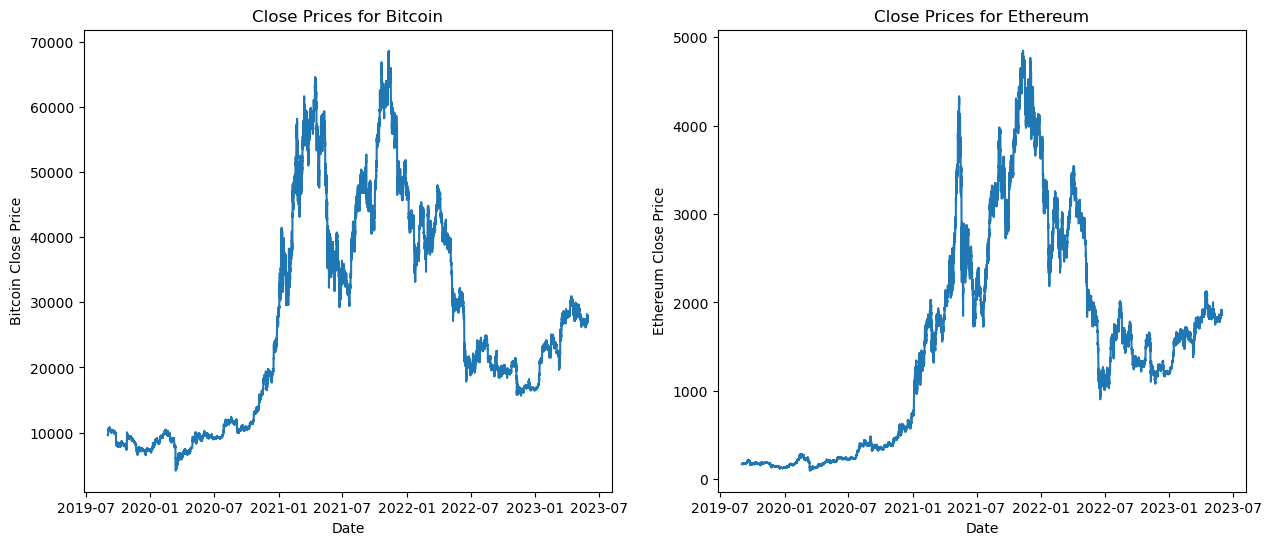

In [29]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Close prices
sns.lineplot(data = df_btc.close, ax = axes[0])
axes[0].set_title("Close Prices for Bitcoin")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Bitcoin Close Price")

# Draw lineplot for Ethereum Close prices
sns.lineplot(data = df_eth.close, ax = axes[1])
axes[1].set_title("Close Prices for Ethereum")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Ethereum Close Price")

plt.show()

Almost they followed same movement as time passed. Prices of coins remained at a certain level until 2021, but after 2021 increased. Between 2021 to 2020, prices of coins reached its maximum. After 2022, prices dropped quite a bit. Prives tends to recover nowadays

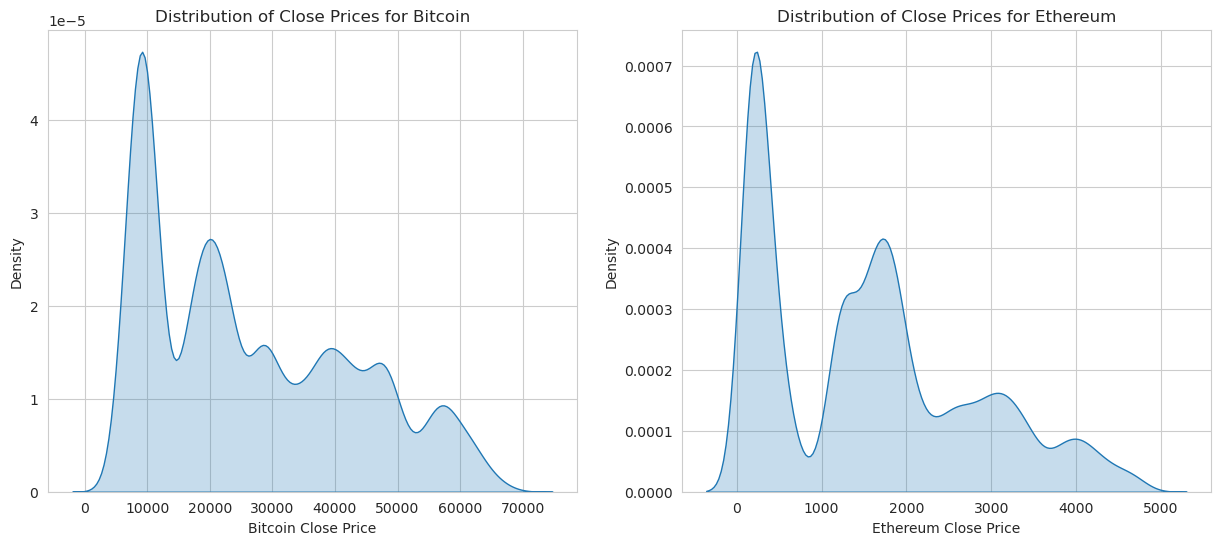

In [30]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Close prices
sns.kdeplot(data = df_btc.close, ax = axes[0], fill = True)
axes[0].set_title("Distribution of Close Prices for Bitcoin")
axes[0].set_xlabel("Bitcoin Close Price")
axes[0].set_ylabel("Density")

# Draw lineplot for Ethereum Close prices
sns.kdeplot(data = df_eth.close, ax = axes[1], fill = True)
axes[1].set_title("Distribution of Close Prices for Ethereum")
axes[1].set_xlabel("Ethereum Close Price")
axes[1].set_ylabel("Density")

plt.show()

Does not have a specific desired distribution. Let's log transformation and examine it

In [31]:
# Create features which containing log  of close prices
df_btc["log_close_price"] = np.log1p(df_btc["close"])
df_eth["log_close_price"] = np.log1p(df_eth["close"])

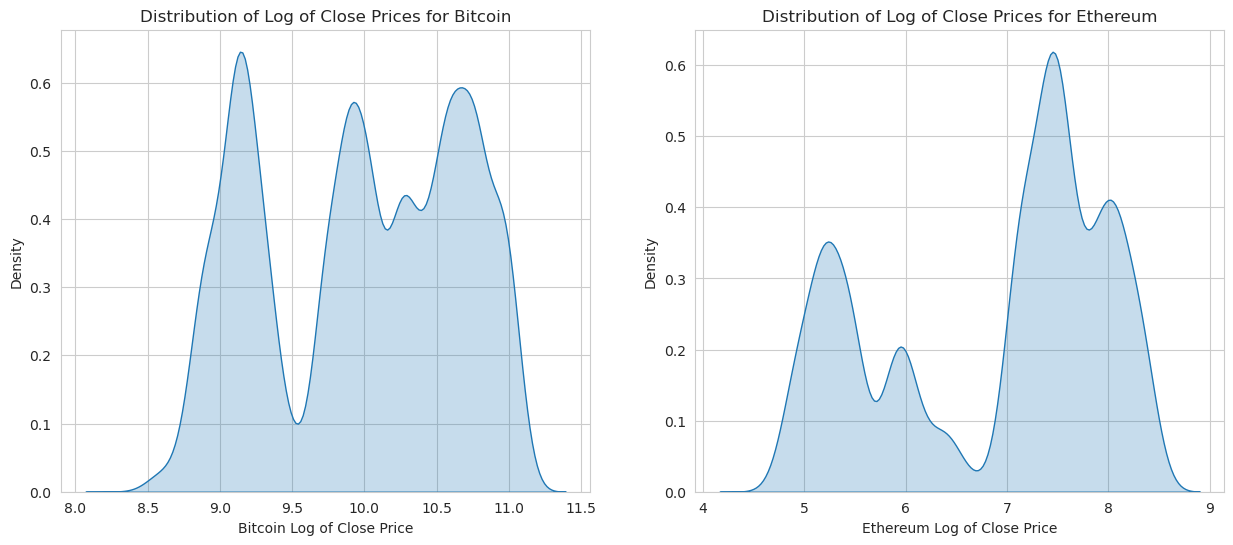

In [32]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot to Log of Close prices for Bitcoin 
sns.kdeplot(data = df_btc.log_close_price, ax = axes[0], fill = True)
axes[0].set_title("Distribution of Log of Close Prices for Bitcoin")
axes[0].set_xlabel("Bitcoin Log of Close Price")
axes[0].set_ylabel("Density")

# Draw lineplot to Log of Close prices for Ethereum 
sns.kdeplot(data = df_eth.log_close_price, ax = axes[1], fill = True)
axes[1].set_title("Distribution of Log of Close Prices for Ethereum")
axes[1].set_xlabel("Ethereum Log of Close Price")
axes[1].set_ylabel("Density")

plt.show()

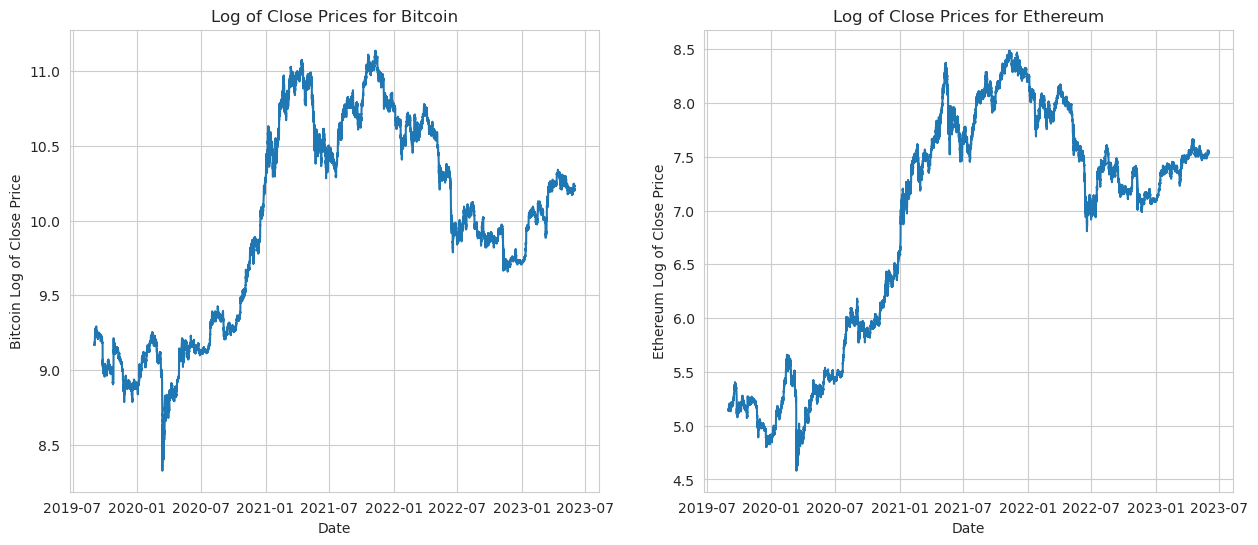

In [33]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Bitcoin Close prices
sns.lineplot(data = df_btc.log_close_price, ax = axes[0])
axes[0].set_title("Log of Close Prices for Bitcoin")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Bitcoin Log of Close Price")

# Draw lineplot for Ethereum Close prices
sns.lineplot(data = df_eth.log_close_price, ax = axes[1])
axes[1].set_title("Log of Close Prices for Ethereum")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Ethereum Log of Close Price")

plt.show()

Log of price for ethereum look like has two normal distribution density. But shape coverged to normal distribution when compared to normal close prices. We are gonna look  If predict that log of price is good.

In [34]:
df_btc.head()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,log_close_price
2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,5.257943e+06,7428.0,261.131656,2.510480e+06,9.171398
2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,4.362498e+06,5789.0,258.764082,2.491295e+06,9.171183
2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,4.400751e+06,5485.0,321.355630,3.088171e+06,9.170224
2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,6.092024e+06,5500.0,446.853542,4.296649e+06,9.172017
2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,5.216076e+06,5536.0,368.470786,3.544535e+06,9.171127


## Volume Features

In [35]:
df_btc.volume.describe()

count     32856.000000
mean       4236.939145
std        5216.480581
min           0.000000
25%        1426.532502
50%        2424.728458
75%        4931.432952
max      137207.188600
Name: volume, dtype: float64

Minimum value is 0. It seems there is a mistake but we should check.

In [36]:
df_eth.volume.describe()

count     32856.000000
mean      30924.030826
std       31423.936226
min           0.000000
25%       12668.399430
50%       21697.994090
75%       37392.068875
max      493227.882820
Name: volume, dtype: float64

Also in ethereum dataset, there is a zero value. 

In [37]:
df_btc[df_btc["volume"] == 0]

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,log_close_price
2020-12-21 14:00:00,22646.53,22646.53,22646.53,22646.53,0.0,0.0,0.0,0.0,0.0,10.027806
2021-02-11 03:00:00,44582.07,44582.07,44582.07,44582.07,0.0,0.0,0.0,0.0,0.0,10.705109
2023-03-24 12:00:00,28080.00,28080.00,28080.00,28080.00,0.0,0.0,0.0,0.0,0.0,10.242848


In [38]:
df_eth[df_eth["volume"] == 0]

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,log_close_price
2020-12-21 14:00:00,608.31,608.31,608.31,608.31,0.0,0.0,0.0,0.0,0.0,6.412327
2021-02-11 03:00:00,1721.86,1721.86,1721.86,1721.86,0.0,0.0,0.0,0.0,0.0,7.451741
2023-03-24 12:00:00,1789.52,1789.52,1789.52,1789.52,0.0,0.0,0.0,0.0,0.0,7.490261


When volumes is 0, OHLC(Open, High, Low, Close) remain same. So there should be weird thing when this happen. So I am gonna change this values

In [39]:
# Change rows with 0 values to NaN
df_btc.loc[df_btc.volume == 0, :] = np.nan
df_eth.loc[df_eth.volume == 0, :] = np.nan

# Interpolate missing values using time method
df_btc = df_btc.interpolate(method='time')
df_eth = df_eth.interpolate(method='time')

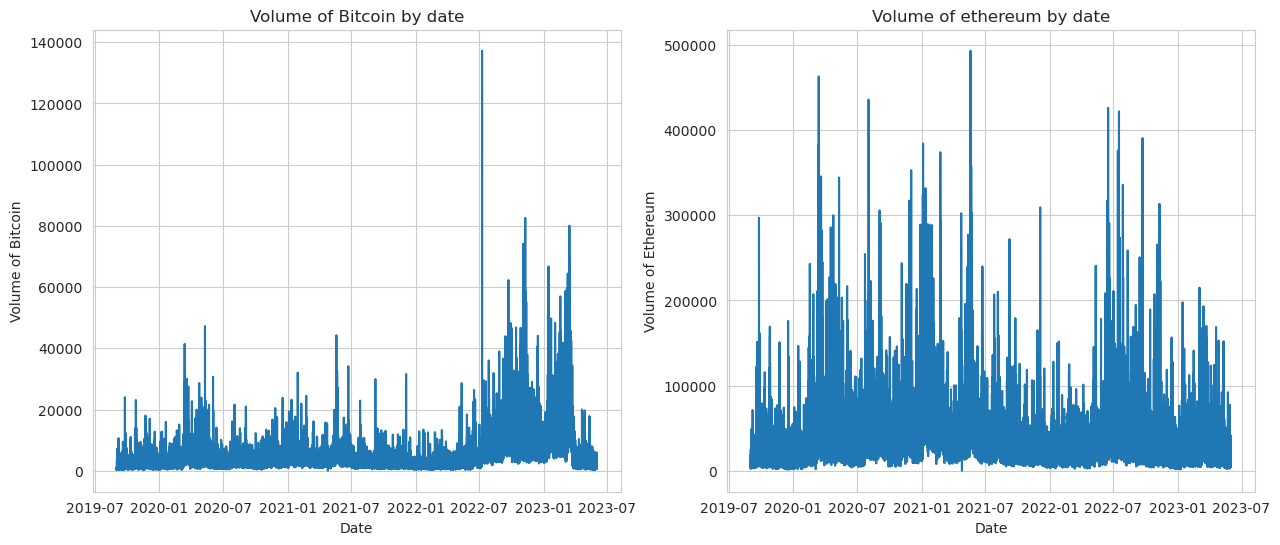

In [40]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Volume of Bitcoin 
sns.lineplot(data = df_btc.volume, ax = axes[0])
axes[0].set_title("Volume of Bitcoin by date")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Volume of Bitcoin")

# Draw lineplot for Volume of Ethereum 
sns.lineplot(data = df_eth.volume, ax = axes[1])
axes[1].set_title("Volume of ethereum by date")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Volume of Ethereum")

plt.show()

In between 2022 July, volume of btc are increased highly. We should look at this

## Quote_volume Feature

In [41]:
df_btc.quote_volume.describe()

count    3.285600e+04
mean     1.024713e+08
std      1.220068e+08
min      2.922260e+05
25%      2.511812e+07
50%      6.599129e+07
75%      1.341670e+08
max      3.005634e+09
Name: quote_volume, dtype: float64

In [42]:
df_eth.quote_volume.describe()

count    3.285600e+04
mean     4.479536e+07
std      5.746655e+07
min      1.912362e+05
25%      8.591785e+06
50%      2.835071e+07
75%      5.895829e+07
max      1.170476e+09
Name: quote_volume, dtype: float64

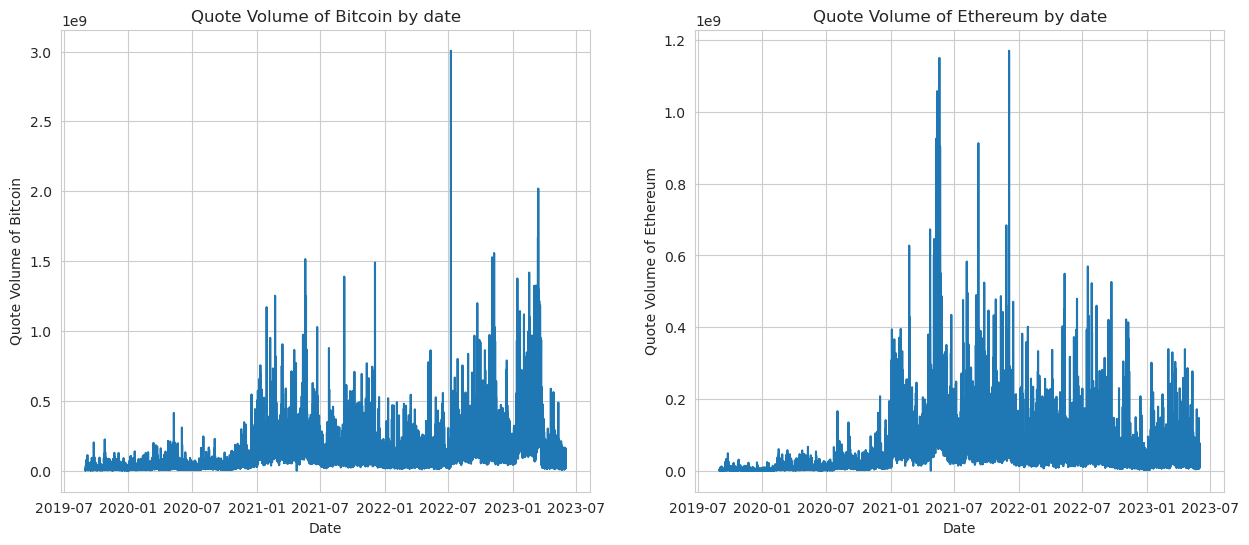

In [43]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Quote Volume of Bitcoin 
sns.lineplot(data = df_btc.quote_volume, ax = axes[0])
axes[0].set_title("Quote Volume of Bitcoin by date")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Quote Volume of Bitcoin")

# Draw lineplot for Quote Volume of Ethereum 
sns.lineplot(data = df_eth.quote_volume, ax = axes[1])
axes[1].set_title("Quote Volume of Ethereum by date")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Quote Volume of Ethereum")

plt.show()

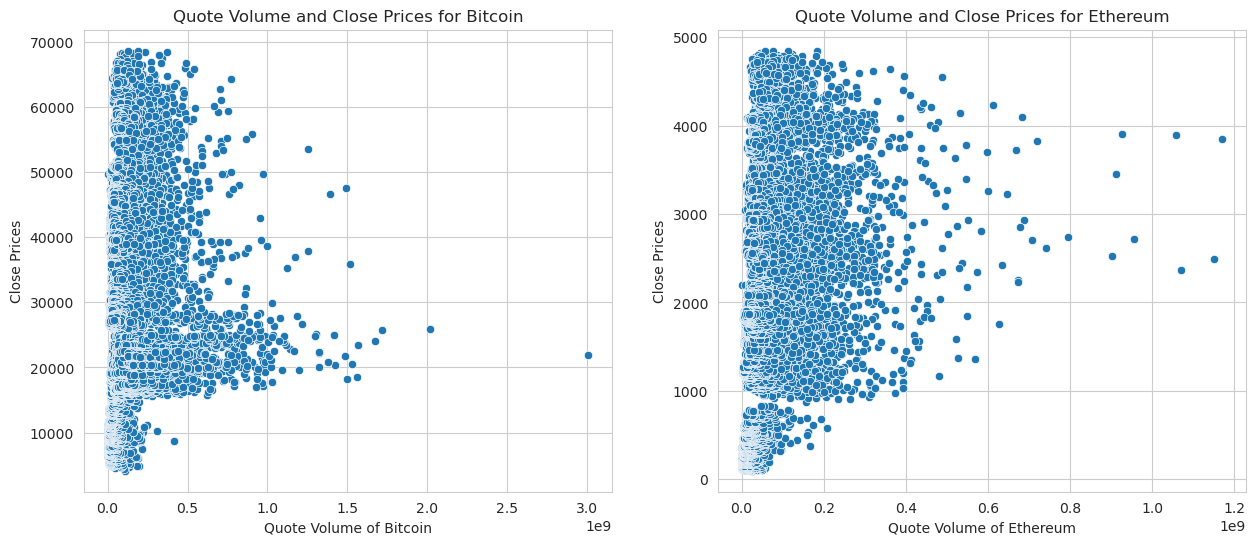

In [44]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot for Quote Volume and Close Prices for Bitcoin
sns.scatterplot(data = df_btc, y = "close", x = "quote_volume", ax = axes[0])
axes[0].set_title("Quote Volume and Close Prices for Bitcoin")
axes[0].set_ylabel("Close Prices")
axes[0].set_xlabel("Quote Volume of Bitcoin")

# Draw scatterplot for Quote Volume and Close Prices for Ethereum
sns.scatterplot(data = df_eth, y = "close", x = "quote_volume", ax = axes[1])
axes[1].set_title("Quote Volume and Close Prices for Ethereum")
axes[1].set_ylabel("Close Prices")
axes[1].set_xlabel("Quote Volume of Ethereum")

plt.show()

This feature seems like not correlated with close prices. We can do some operations to get valuable column 

In [45]:
df_btc["quote_volume_band"] = pd.qcut(df_btc["quote_volume"], q = 5)
df_eth["quote_volume_band"] = pd.qcut(df_eth["quote_volume"], q = 5)

In [46]:
df_btc.groupby(by = "quote_volume_band")["close"].mean().sort_values(ascending = True)

quote_volume_band
(292226.012, 19992304.294]         10041.740019
(19992304.294, 47000994.148]       21933.670558
(156801941.827, 3005633669.261]    31331.547796
(47000994.148, 88306802.444]       34106.701237
(88306802.444, 156801941.827]      35665.255985
Name: close, dtype: float64

In [47]:
df_eth.groupby(by = "quote_volume_band")["close"].mean().sort_values(ascending = True)

quote_volume_band
(191236.18600000002, 6075598.448]     221.110484
(6075598.448, 19195724.249]           863.376513
(19195724.249, 38616920.179]         1892.485110
(38616920.179, 68716488.78]          2308.028280
(68716488.78, 1170475765.356]        2484.564488
Name: close, dtype: float64

In [48]:
# Change quote volumes by band values for Bitcoin
df_btc.loc[(df_btc["quote_volume"] >= 292226.012) & (df_btc["quote_volume"] < 19992304.294), "quote_volume"] = 1
df_btc.loc[(df_btc["quote_volume"] >= 19992304.294) & (df_btc["quote_volume"] < 47000994.148), "quote_volume"] = 2
df_btc.loc[(df_btc["quote_volume"] >= 156801941.827) & (df_btc["quote_volume"] < 3005633669.261), "quote_volume"] = 3
df_btc.loc[(df_btc["quote_volume"] >= 47000994.148) & (df_btc["quote_volume"] < 88306802.444), "quote_volume"] = 4
df_btc.loc[(df_btc["quote_volume"] >= 88306802.444) & (df_btc["quote_volume"] < 156801941.827), "quote_volume"] = 5


# Change quote volumes by band values for Ethereum
df_eth.loc[(df_eth["quote_volume"] >= 191236.18600000002) & (df_eth["quote_volume"] < 6075598.448), "quote_volume"] = 1
df_eth.loc[(df_eth["quote_volume"] >= 6075598.448) & (df_eth["quote_volume"] < 19195724.249), "quote_volume"] = 2
df_eth.loc[(df_eth["quote_volume"] >= 19195724.249) & (df_eth["quote_volume"] < 38616920.179), "quote_volume"] = 3
df_eth.loc[(df_eth["quote_volume"] >= 38616920.179) & (df_eth["quote_volume"] < 68716488.78), "quote_volume"] = 4
df_eth.loc[(df_eth["quote_volume"] >= 68716488.78) & (df_eth["quote_volume"] < 1170475765.356), "quote_volume"] = 5

In [49]:
# Drop quote_volume_band feature
df_btc = df_btc.drop(["quote_volume_band"], axis = 1)
df_eth = df_eth.drop(["quote_volume_band"], axis = 1)

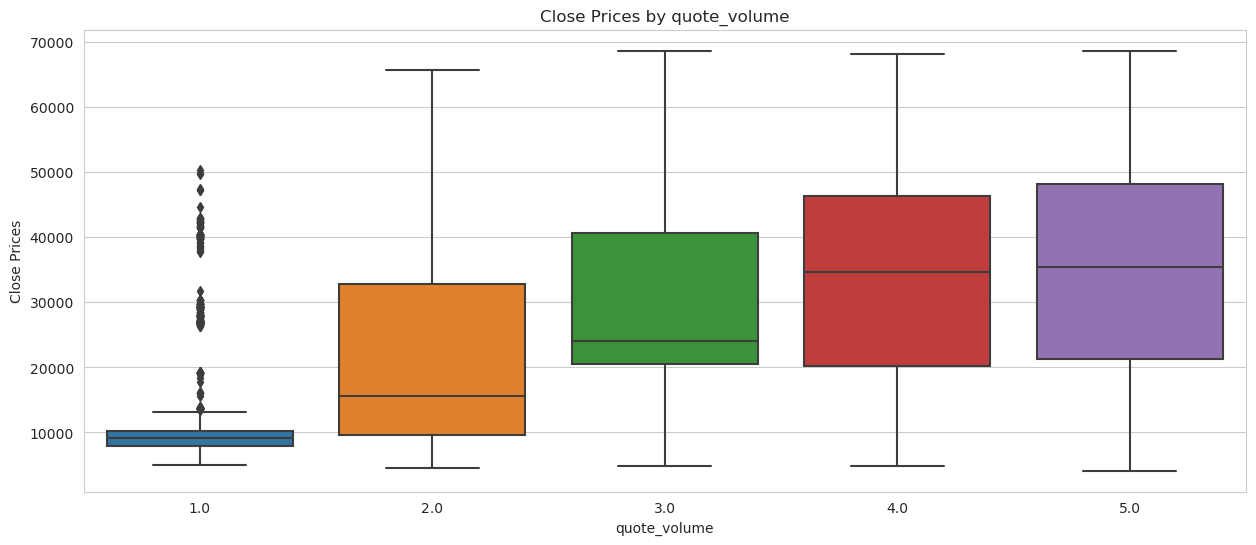

In [50]:
draw_boxplot(df_btc, "quote_volume")

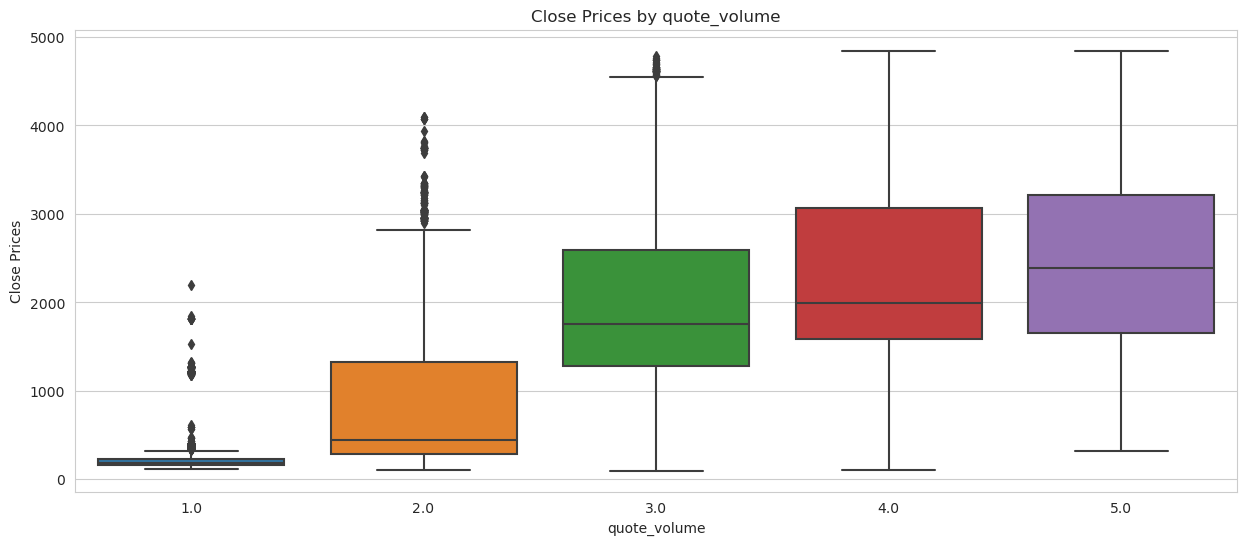

In [51]:
draw_boxplot(df_eth, "quote_volume")

## Count Features

In [52]:
df_btc["count"].describe()

count    3.285600e+04
mean     9.001369e+04
std      1.093357e+05
min      2.240000e+02
25%      2.716200e+04
50%      4.914100e+04
75%      1.049625e+05
max      1.442097e+06
Name: count, dtype: float64

In [53]:
df_eth["count"].describe()

count     32856.000000
mean      32427.433212
std       32994.613936
min         412.000000
25%       11582.250000
50%       23425.500000
75%       41194.250000
max      536376.000000
Name: count, dtype: float64

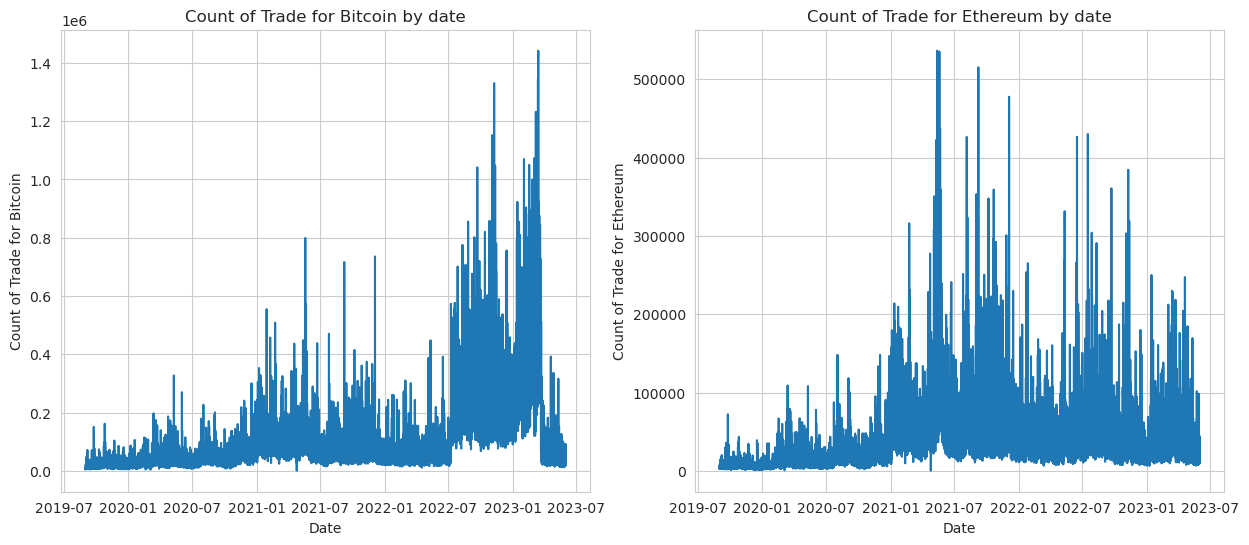

In [54]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot for Count of Trade for Bitcoin 
sns.lineplot(data = df_btc["count"], ax = axes[0])
axes[0].set_title("Count of Trade for Bitcoin by date")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Count of Trade for Bitcoin")

# Draw lineplot for Count of Trade for Ethereum 
sns.lineplot(data = df_eth["count"], ax = axes[1])
axes[1].set_title("Count of Trade for Ethereum by date")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Count of Trade for Ethereum")

plt.show()

Between 2022-July to 2023-03, count of trade for bitcoin increased. 

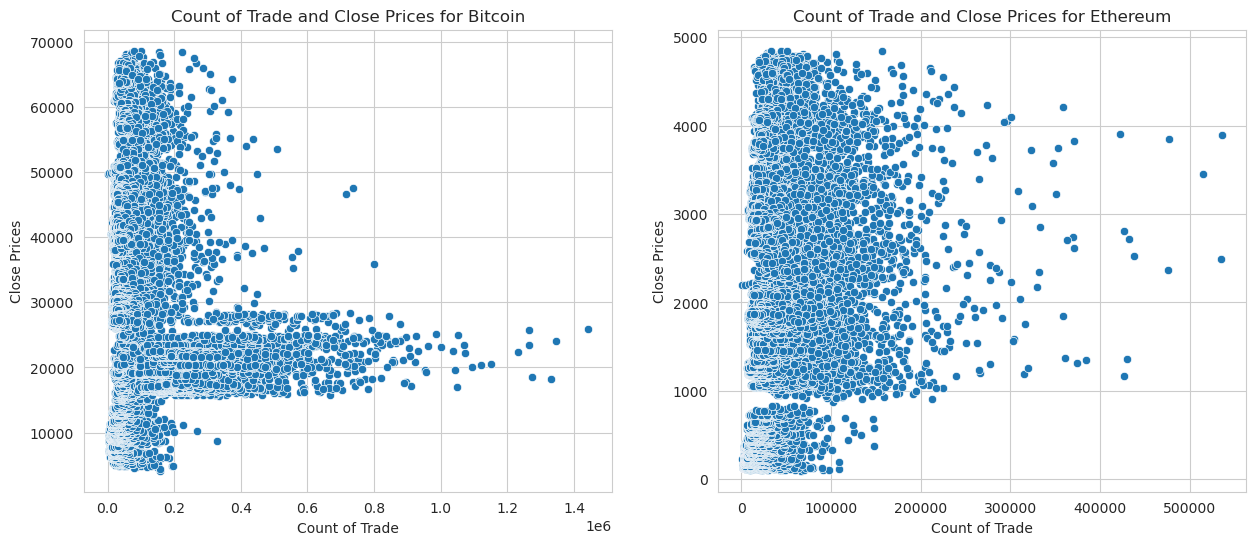

In [55]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw scatterplot for Count of Trade and Close Prices for Bitcoin
sns.scatterplot(data = df_btc, y = "close", x = "count", ax = axes[0])
axes[0].set_title("Count of Trade and Close Prices for Bitcoin")
axes[0].set_ylabel("Close Prices")
axes[0].set_xlabel("Count of Trade")

# Draw scatterplot for Quote Volume and Close Prices for Ethereum
sns.scatterplot(data = df_eth, y = "close", x = "count", ax = axes[1])
axes[1].set_title("Count of Trade and Close Prices for Ethereum")
axes[1].set_ylabel("Close Prices")
axes[1].set_xlabel("Count of Trade")

plt.show()

In [56]:
df_btc["count_band"] = pd.qcut(df_btc["count"], q = 5)
df_eth["count_band"] = pd.qcut(df_eth["count"], q = 5)

In [57]:
df_btc.groupby(by = "count_band")["close"].mean().sort_values(ascending = True)

count_band
(223.999, 23691.0]       11753.038485
(132529.0, 1442097.0]    23774.474874
(23691.0, 38751.0]       25633.144505
(38751.0, 63518.0]       34319.922731
(63518.0, 132529.0]      37598.074569
Name: close, dtype: float64

In [58]:
df_eth.groupby(by = "count_band")["close"].mean().sort_values(ascending = True)

count_band
(411.999, 9325.0]       245.534609
(9325.0, 18522.0]      1132.980478
(18522.0, 29171.0]     1937.686955
(29171.0, 47075.0]     2159.750906
(47075.0, 536376.0]    2293.642004
Name: close, dtype: float64

In [59]:
# Change quote volumes by band values for Bitcoin
df_btc.loc[(df_btc["count"] >= 223.999) & (df_btc["count"] < 23691.0), "count"] = 1
df_btc.loc[(df_btc["count"] >= 132529.0) & (df_btc["count"] <= 1442097.0), "count"] = 2
df_btc.loc[(df_btc["count"] >= 23691.0) & (df_btc["count"] < 38751.0), "count"] = 3
df_btc.loc[(df_btc["count"] >= 38751.0) & (df_btc["count"] < 63518.0), "count"] = 4
df_btc.loc[(df_btc["count"] >= 63518.0) & (df_btc["count"] < 132529.0), "count"] = 5


# Change quote volumes by band values for Ethereum
df_eth.loc[(df_eth["count"] >= 411.999) & (df_eth["count"] < 9325.0), "count"] = 1
df_eth.loc[(df_eth["count"] >= 9325.0) & (df_eth["count"] < 18522.0), "count"] = 2
df_eth.loc[(df_eth["count"] >= 18522.0) & (df_eth["count"] < 29171.0), "count"] = 3
df_eth.loc[(df_eth["count"] >= 29171.0) & (df_eth["count"] < 47075.0), "count"] = 4
df_eth.loc[(df_eth["count"] >= 47075.0) & (df_eth["count"] <= 536376.0), "count"] = 5

In [60]:
# Drop count_band feature
df_btc = df_btc.drop(["count_band"], axis = 1)
df_eth = df_eth.drop(["count_band"], axis = 1)

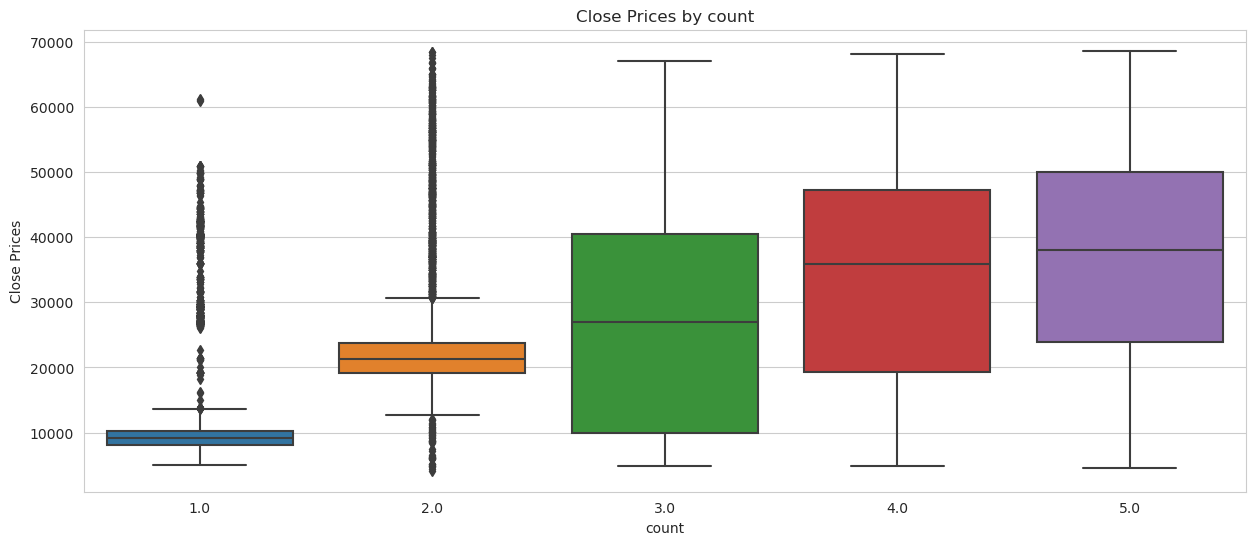

In [61]:
draw_boxplot(df_btc, "count")

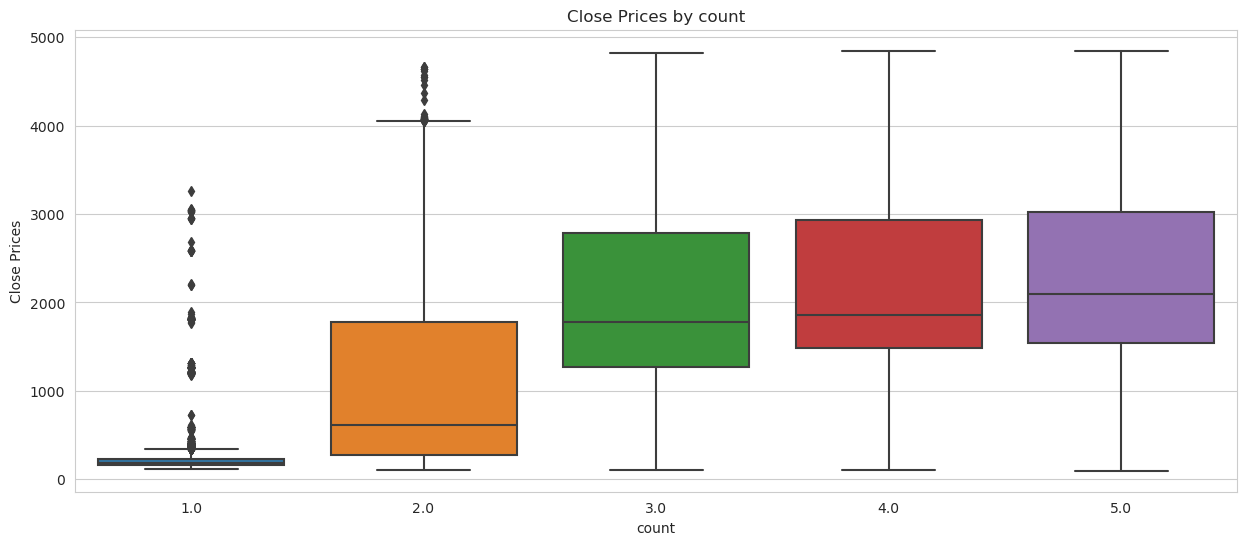

In [62]:
draw_boxplot(df_eth, "count")

## Taket_Buy_Volume Features

In [63]:
df_btc.taker_buy_volume.describe()

count    32856.000000
mean      2096.799828
std       2601.354240
min          4.229245
25%        697.989390
50%       1195.745150
75%       2427.789450
max      68611.450390
Name: taker_buy_volume, dtype: float64

In [64]:
df_eth.taker_buy_volume.describe()

count     32856.000000
mean      15412.926695
std       15617.050578
min          68.857680
25%        6297.699640
50%       10793.747500
75%       18643.182968
max      238996.465800
Name: taker_buy_volume, dtype: float64

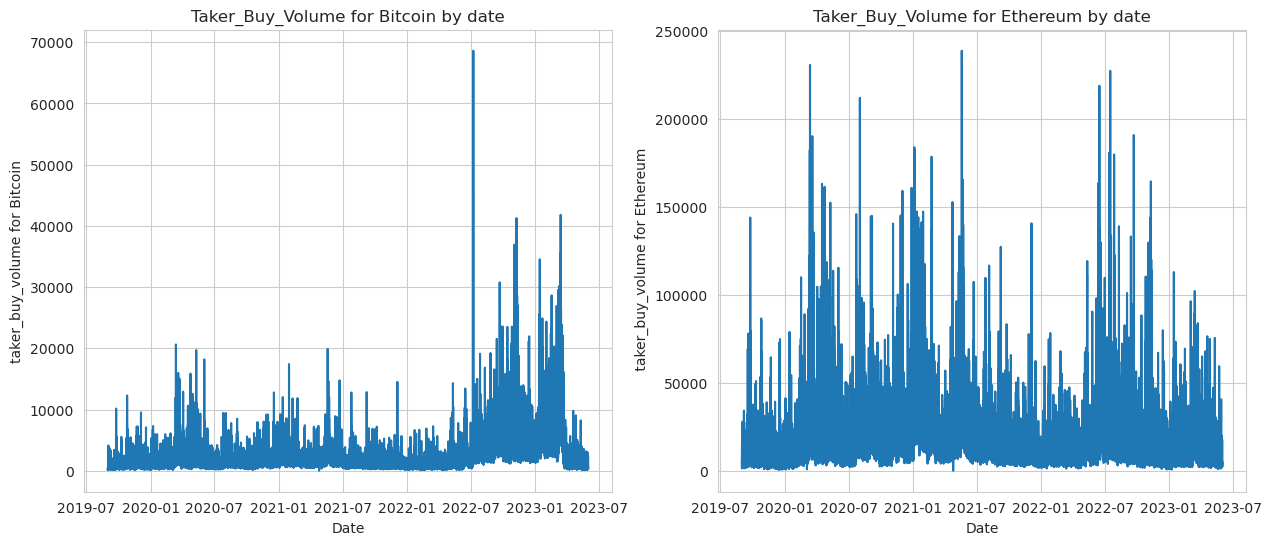

In [65]:
# Create a figure and axes
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Set the figure size
fig.set_size_inches(15,6)

# Set Graph Style for Bitcoin and Ethereum Prices
sns.set_style("whitegrid")

# Draw lineplot to taker_buy_volume for Bitcoin 
sns.lineplot(data = df_btc["taker_buy_volume"], ax = axes[0])
axes[0].set_title("Taker_Buy_Volume for Bitcoin by date")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("taker_buy_volume for Bitcoin")

# Draw lineplot to taker_buy_volume for Ethereum 
sns.lineplot(data = df_eth["taker_buy_volume"], ax = axes[1])
axes[1].set_title("Taker_Buy_Volume for Ethereum by date")
axes[1].set_xlabel("Date")
axes[1].set_ylabel(" taker_buy_volume for Ethereum")

plt.show()

Ethereum data is more stable than bitcoin data for taher_buy_volume feature

# Feature Engineering

## Time-Based Features

We have a timeseries data and we can specify times as year, month, day, dayofweek, weekofyear and hour.

In [66]:
# Create Time-Based Features
df_btc = datetime_features(df_btc)
df_eth = datetime_features(df_eth)

In [67]:
df_btc.head()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taher_buy_quote_volume,log_close_price,hour,month,year,day,dayofweek,quarter,weekofyear
2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,1.0,1.0,261.131656,2.510480e+06,9.171398,0,9,2019,1,6,3,35
2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,1.0,1.0,258.764082,2.491295e+06,9.171183,1,9,2019,1,6,3,35
2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,1.0,1.0,321.355630,3.088171e+06,9.170224,2,9,2019,1,6,3,35
2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,1.0,1.0,446.853542,4.296649e+06,9.172017,3,9,2019,1,6,3,35
2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,1.0,1.0,368.470786,3.544535e+06,9.171127,4,9,2019,1,6,3,35


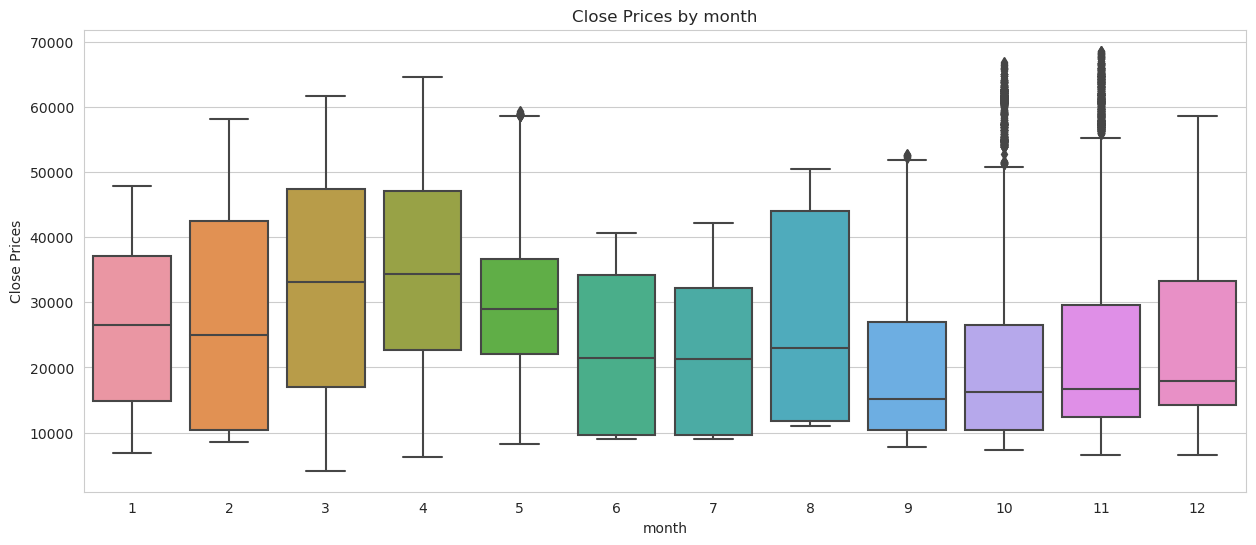

In [68]:
# Draw boxplot BTC Close Prices by months
draw_boxplot(df_btc, "month")

There are a lot of outlier values on 10 and 11th months. In first 4 months, btc close prices are higly when compared to other months. 

In [69]:
# Apply month_cat function to month feature to create month_cat feature
df_btc["month_cat"] = df_btc["month"].apply(month_category_for_bitcoin)

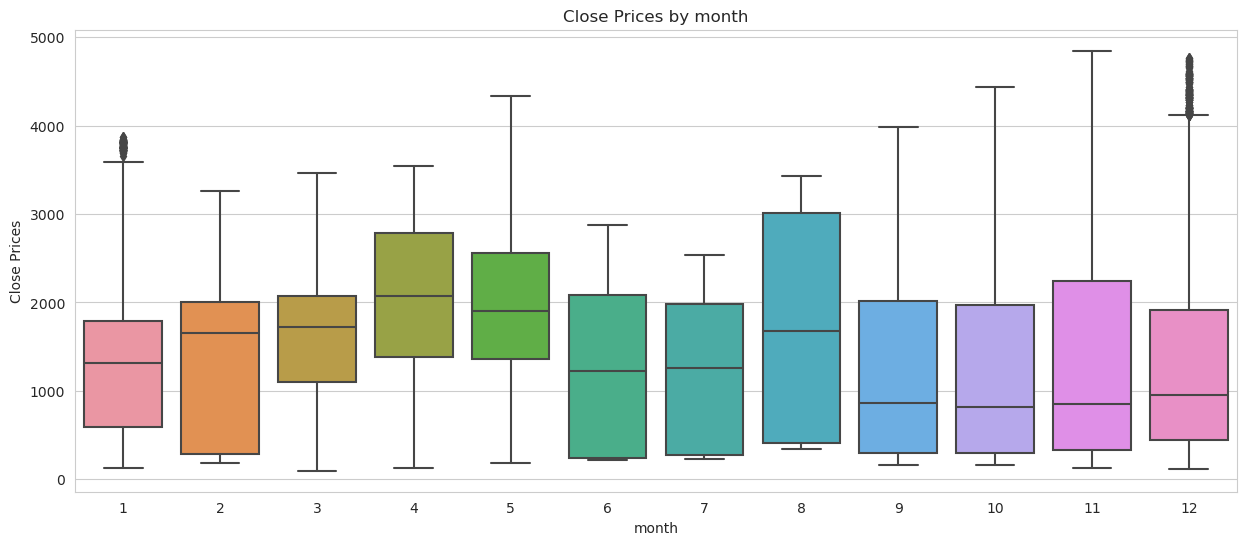

In [70]:
# Draw boxplot ETH Close Prices by months
draw_boxplot(df_eth, "month")

There are a lot of outlier values on 12th month.

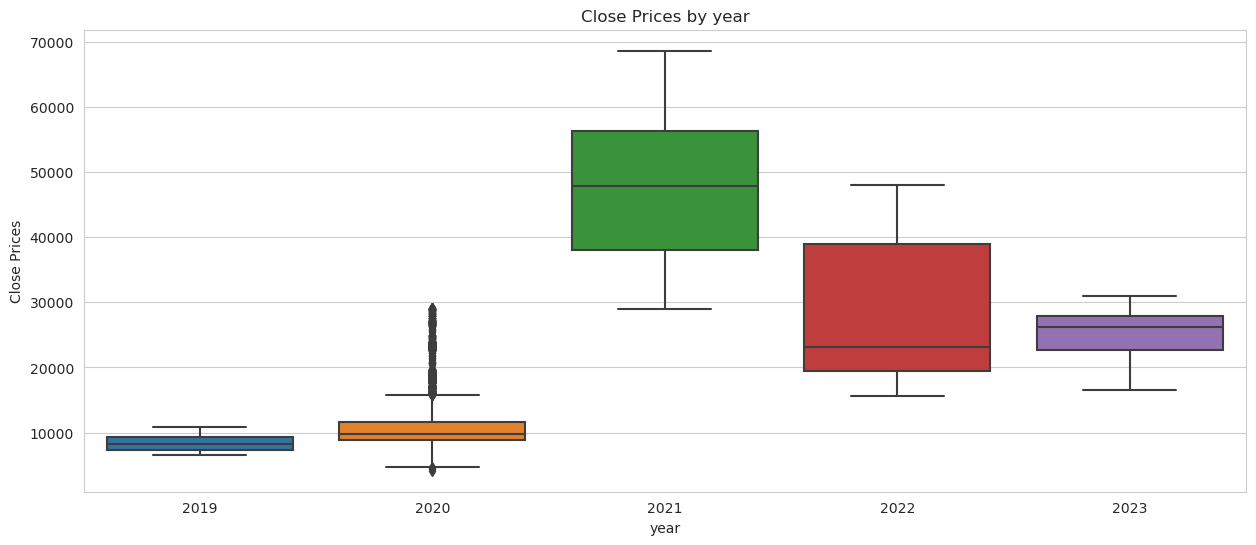

In [71]:
# Draw boxplot BTC Close Prices by years
draw_boxplot(df_btc, "year")

In 2021, Close Price of Bitcoin quite high. In 2019 and 2020, prices quite low. We can say that starting from 2021, there is a significant increase in prices. In 2020, there are outliers.

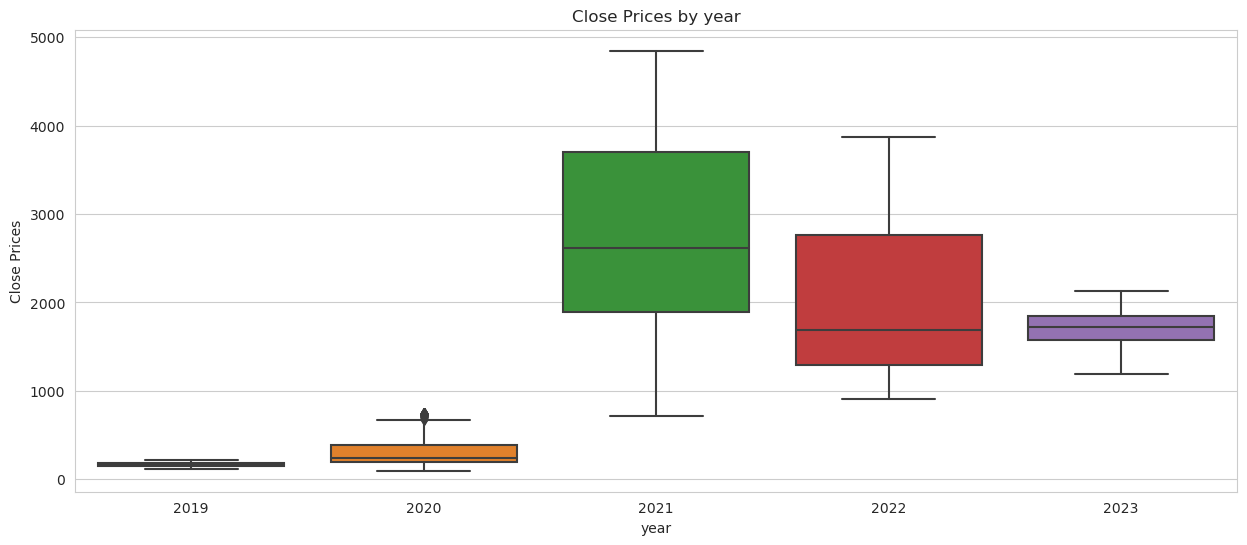

In [72]:
# Draw boxplot ETH Close Prices by years
draw_boxplot(df_eth, "year")

For 2021, 2022 and 2023, almost same graph when compared to bitcoin graph. In 2019, prices quite low.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 6000x3000 with 0 Axes>

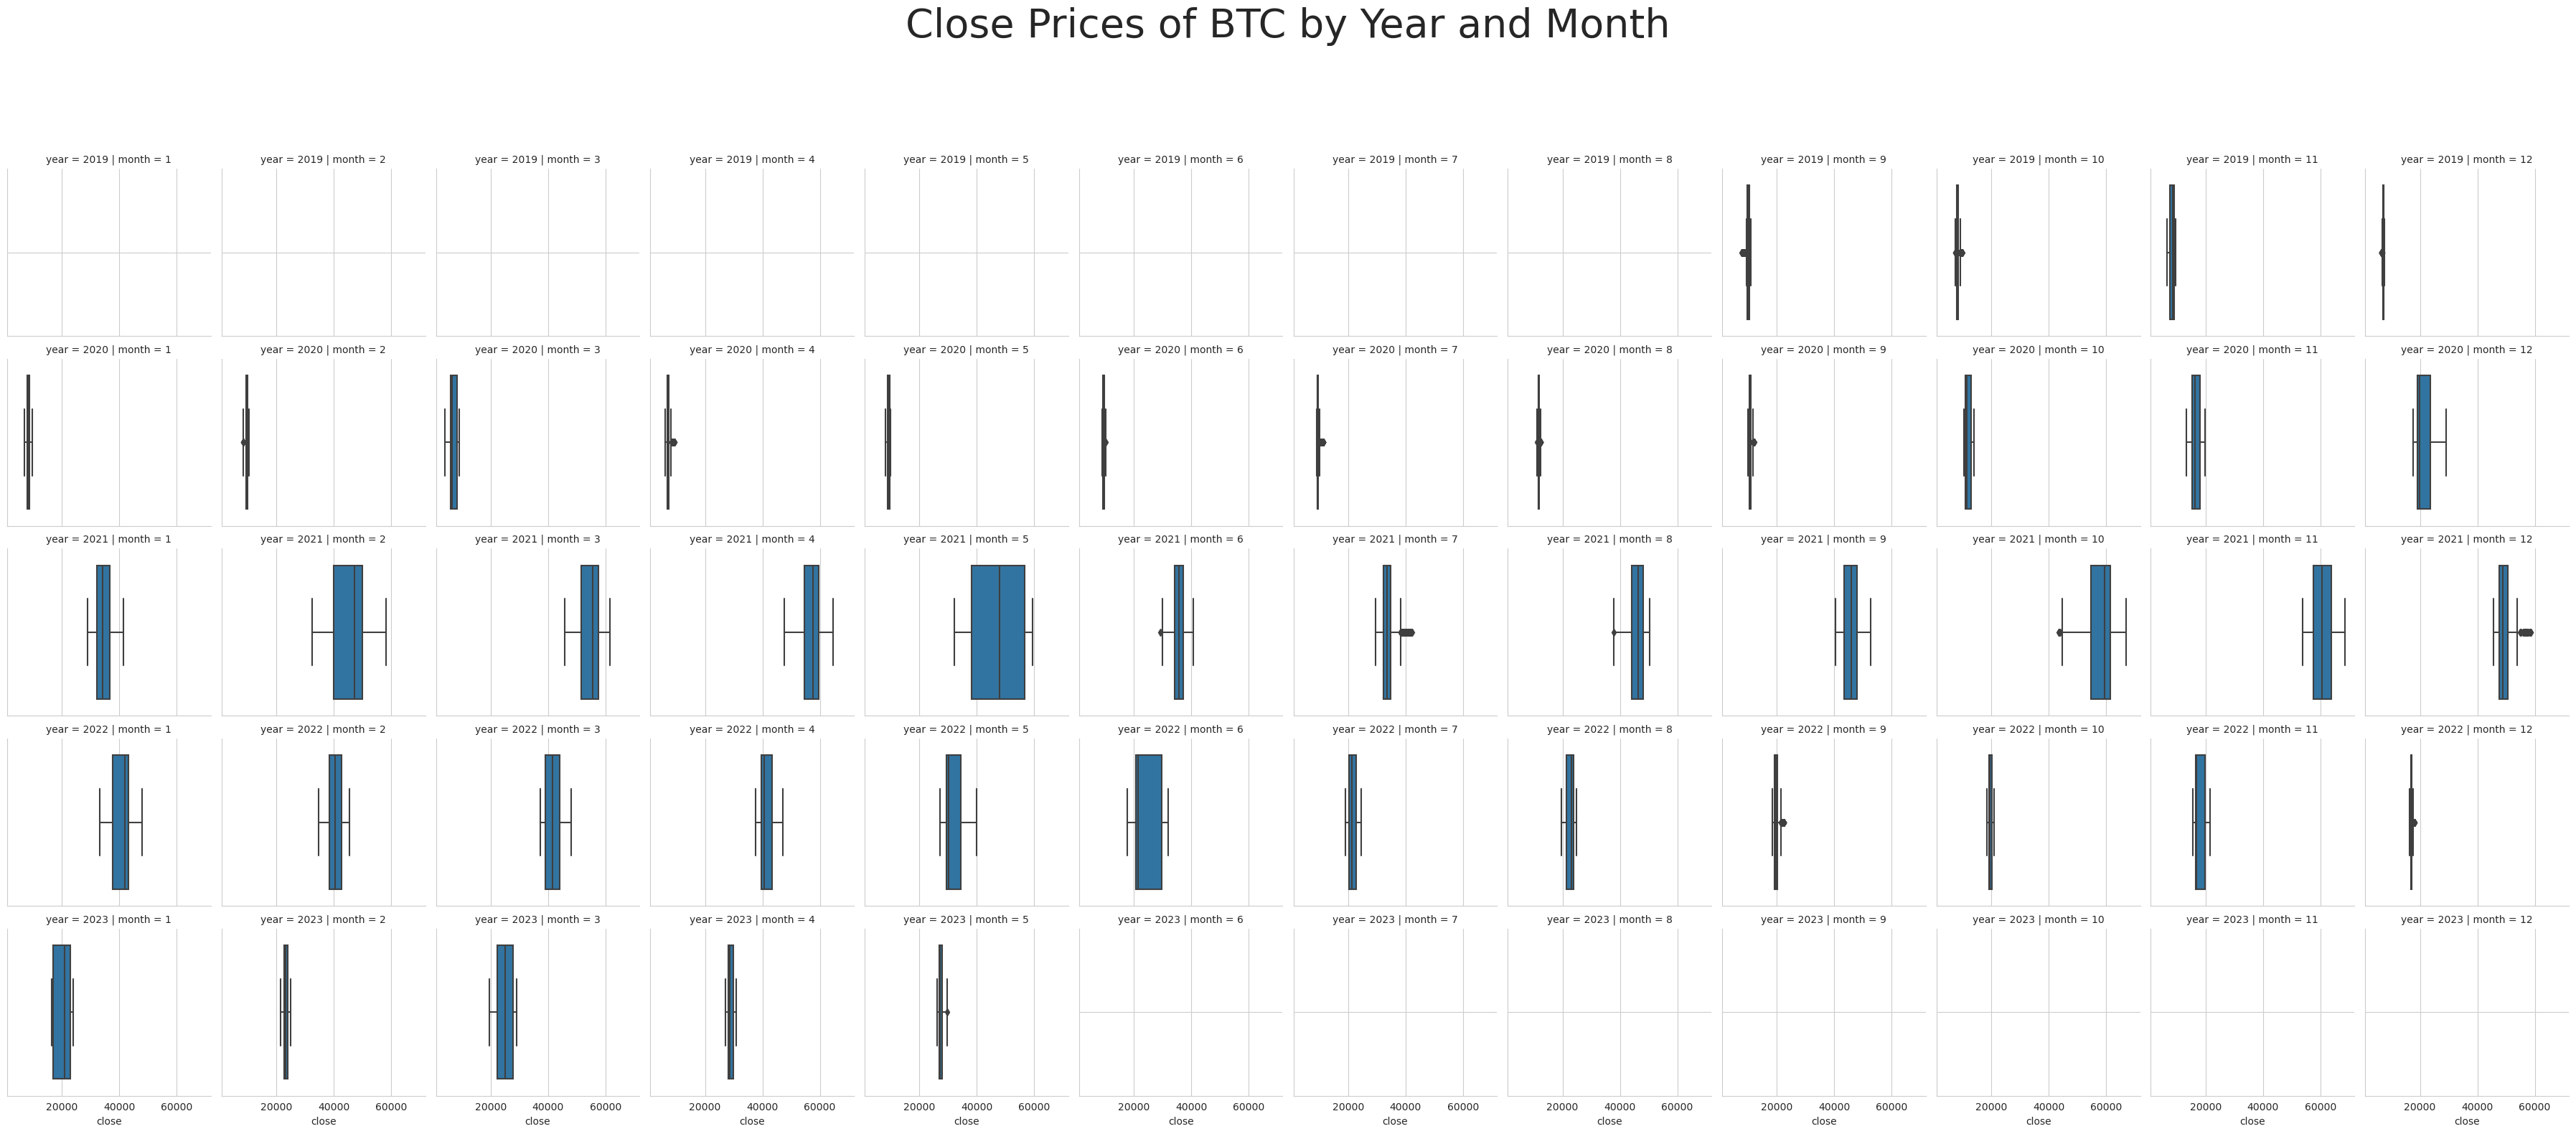

In [73]:
# Create figure with size
plt.figure(figsize = (60, 30))

# Create FacetGrid object
g = sns.FacetGrid(data = df_btc, row = "year", col = "month")

# Create histogram for close feature
g.map(sns.boxplot, "close")

# Set the title for graph
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Close Prices of BTC by Year and Month', y=1.05, fontsize = 40)

#Show the plot
plt.show()

As wee see, In 2021 and 2022 prices really high for Bitcoin. Prices remained at very high levels especially in February, March, April, May, October and November of 2021. 

As wee see, In 2021 and 2022 prices really high for Ethereum. Prices remained at very high levels especially in June, July, September, October and November of 2021.

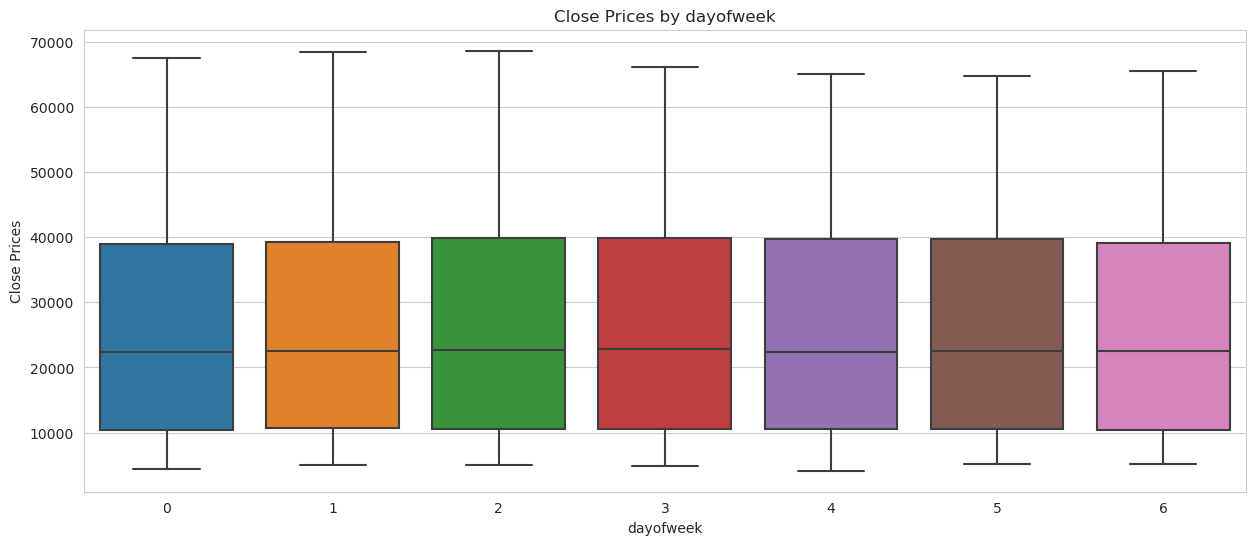

In [74]:
# Draw boxplot for Bitcoin Close Prices by dayofweek
draw_boxplot(df_btc, "dayofweek")

Bitcoin close prices have nothing to do with the days of the week

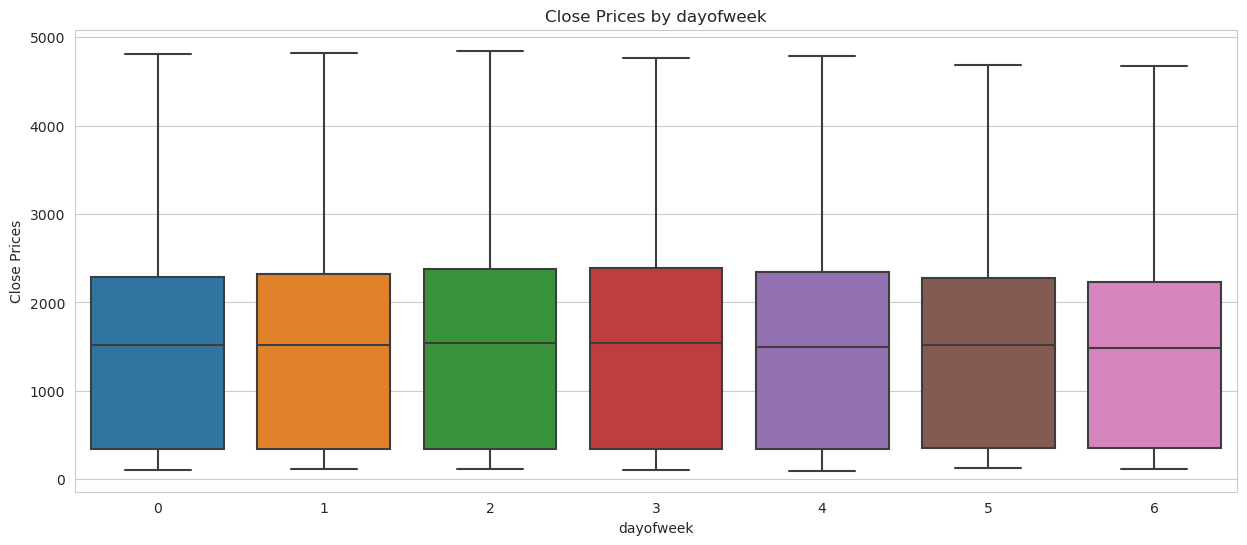

In [75]:
# Draw boxplot for Ethereum Close Prices by dayofweek
draw_boxplot(df_eth, "dayofweek")

Ethereum close prices have nothing to do with the days of the week

In [76]:
# Drop dayofweek feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("dayofweek", axis = 1)
df_eth = df_eth.drop("dayofweek", axis = 1)

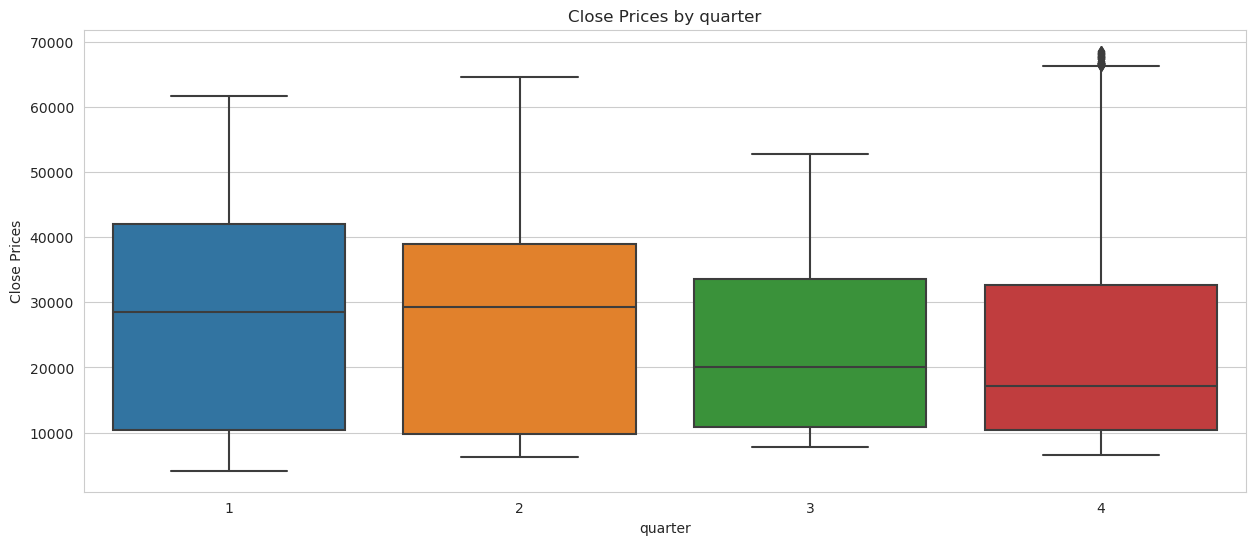

In [77]:
# Draw boxplot for Bitcoin Close Prices by quarters
draw_boxplot(df_btc, "quarter")

In first and second quarter prices are high when compared to other quarters

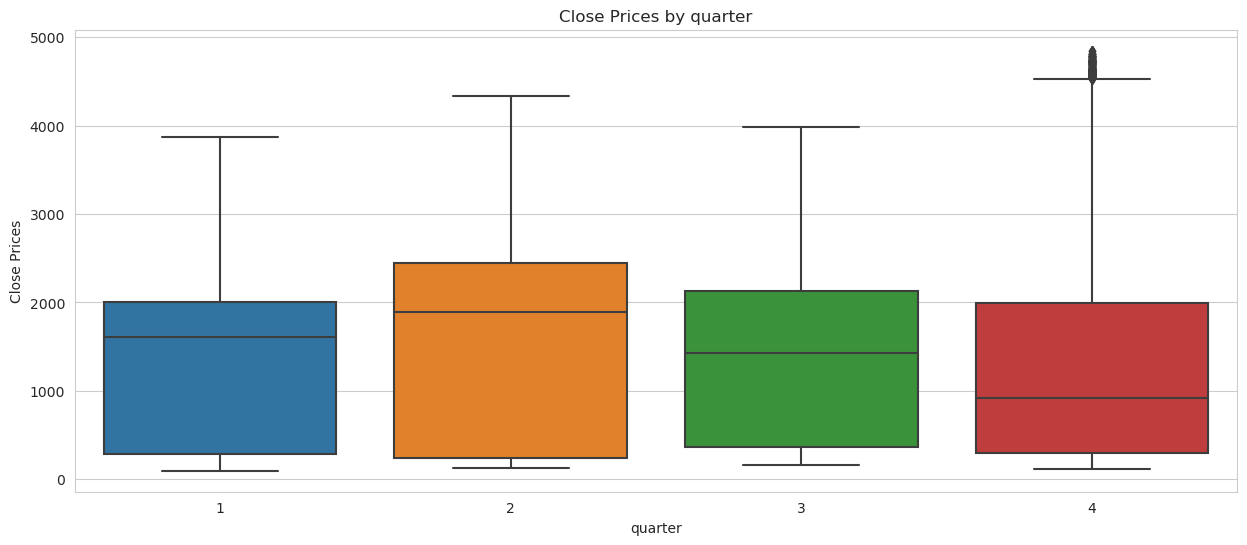

In [78]:
# Draw boxplot for Ethereum Close Prices by quarters
draw_boxplot(df_eth, "quarter")

In second quarter, prices are high compared to others

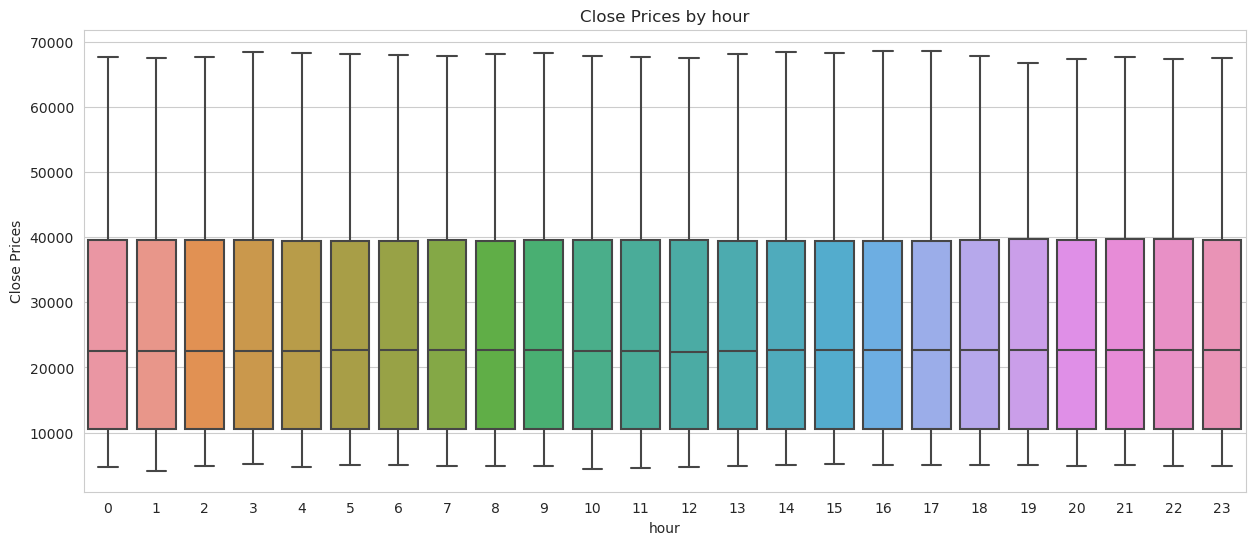

In [79]:
# Draw boxplot for Bitcoin Close Prices by hours
draw_boxplot(df_btc, "hour")

Bitcoin close prices have nothing to do with the hours

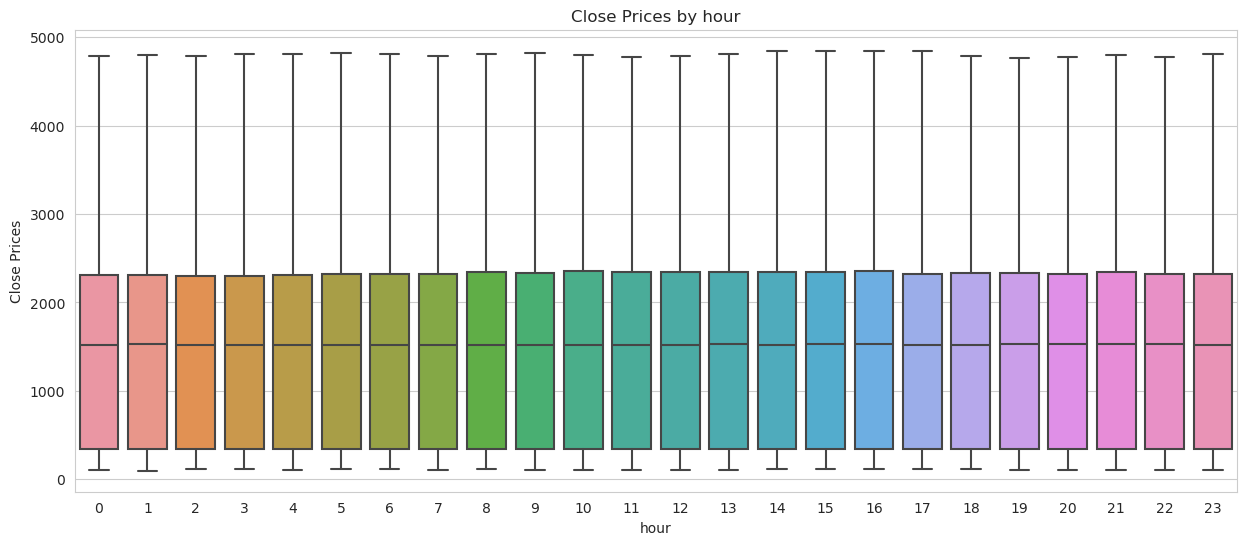

In [80]:
# Draw boxplot for Ethereum Close Prices by hours
draw_boxplot(df_eth, "hour")

Ethereum close prices have nothing to do with the hours

In [81]:
# Drop hour feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("hour", axis = 1)
df_eth = df_eth.drop("hour", axis = 1)

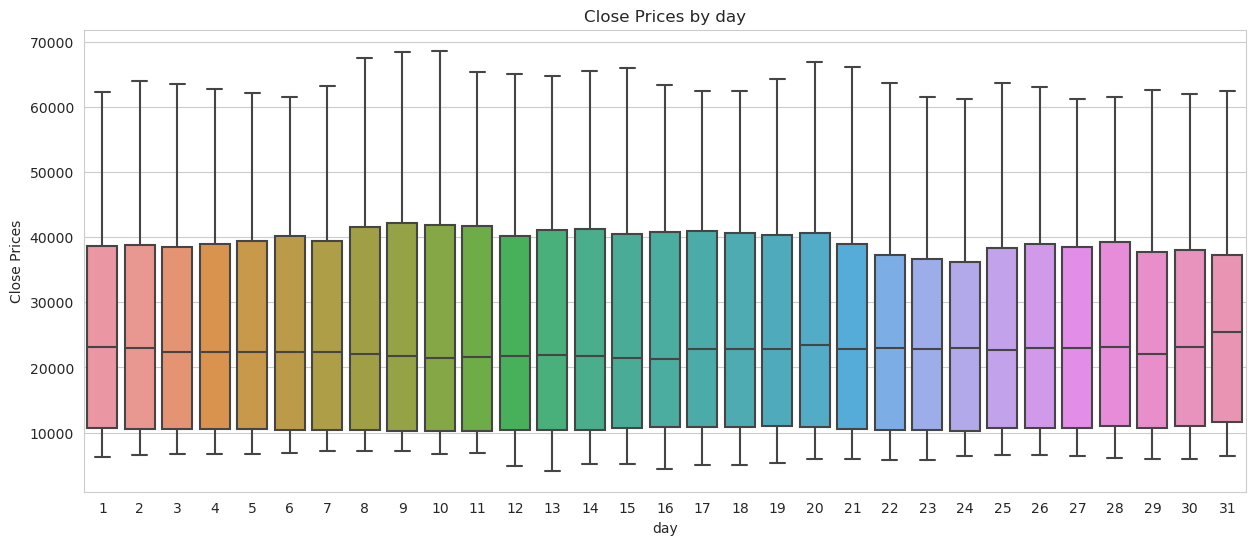

In [82]:
# Draw boxplot for Bitcoin Close Prices by days of month
draw_boxplot(df_btc, "day")

Prices for the days of the month remained almost the same.

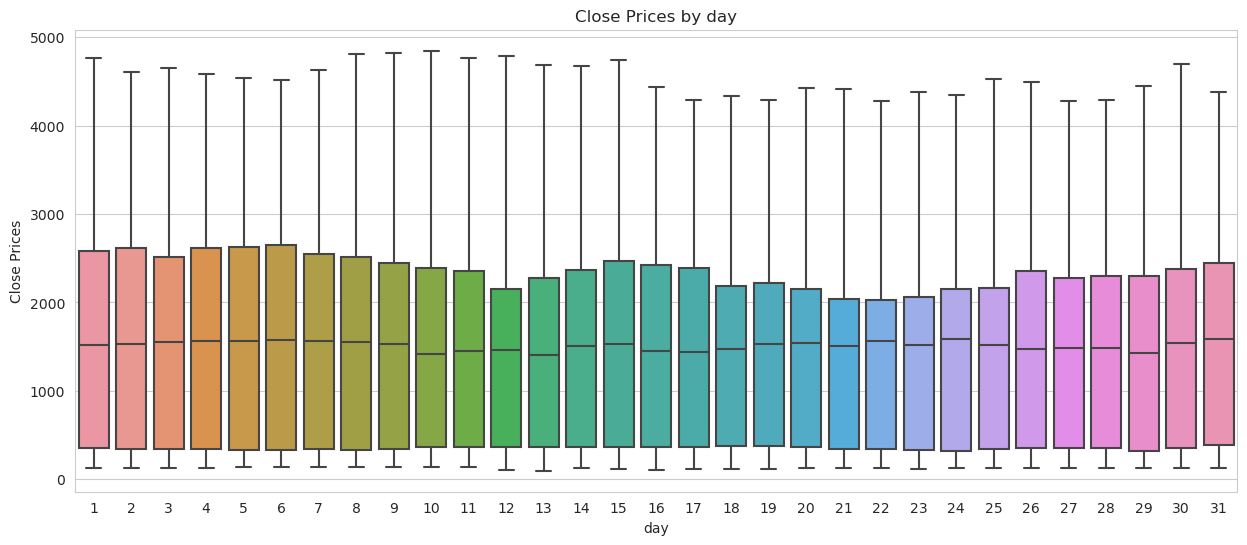

In [83]:
# Draw boxplot for Ethereum Close Prices by days of month
draw_boxplot(df_eth, "day")

Prices for the days of the month remained almost the same.

In [84]:
# Drop day feature from Bitcoin and Ethereum Datasets
df_btc = df_btc.drop("day", axis = 1)
df_eth = df_eth.drop("day", axis = 1)

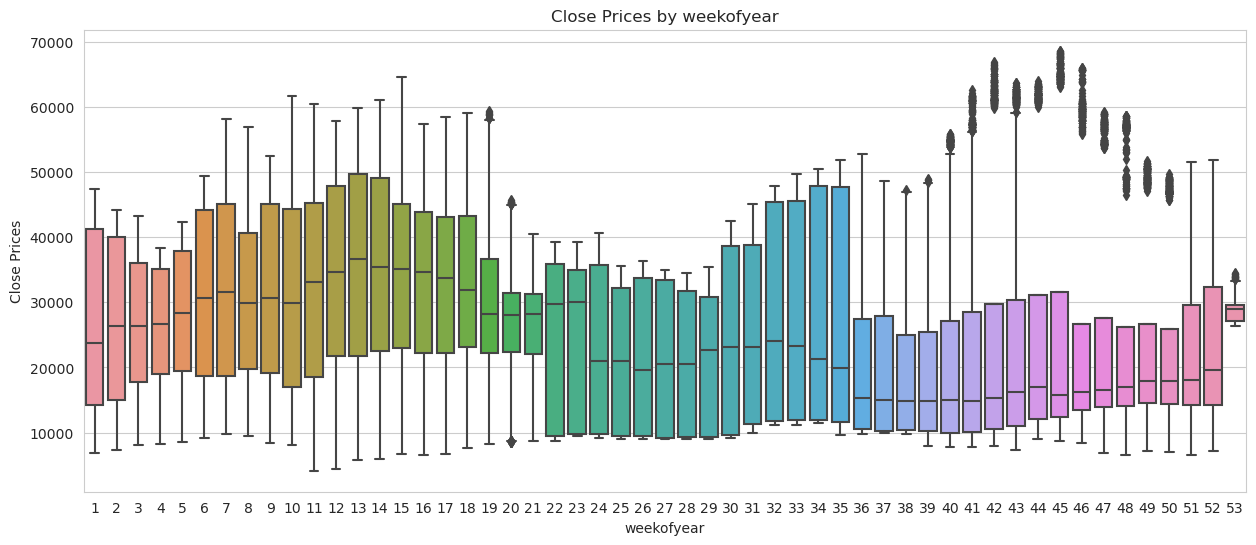

In [85]:
# Draw boxplot for Bitcoin Close Prices by week of years
draw_boxplot(df_btc, "weekofyear")

Starting from 35th week, Bitcoin close prices seems decreased highly.

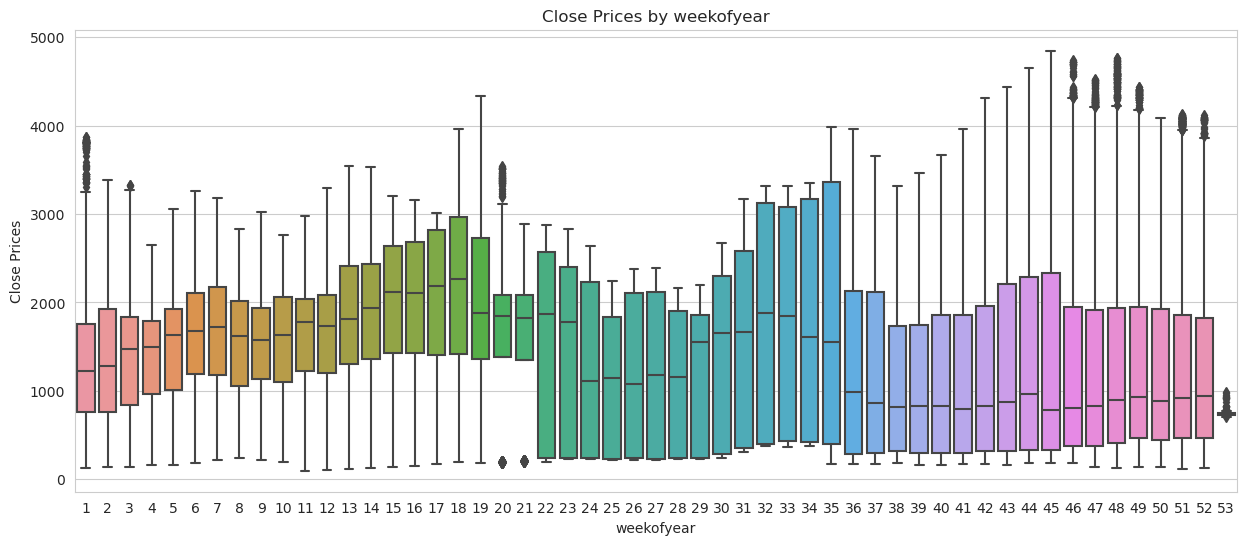

In [86]:
# Draw boxplot for Ethereum Close Prices by week of years
draw_boxplot(df_eth, "weekofyear")

Starting from 37 week, Ethereum close prices decreased,